# Контест 7
## Задача A. Пакеты NumPy и matplotlib

### Часть 1

Сгенерируйте и выведите на экран блочно-диагональную матрицу 8х8, состоящую из двух блоков 4х4 на главной диагонали. Элементы первого блока генерируются из стандартного нормального распределения, второго — из нормального распределения с мат. ожиданием 1 и дисперсией 2. Все остальные элементы матрицы должны быть равными нулю. Вычислите собственные значения получившейся матрицы.

In [1]:
import numpy as np

# Генерация первого блока из стандартного нормального распределения
block1 = np.random.normal(loc=0.0, scale=1.0, size=(4, 4))

# Генерация второго блока из нормального распределения с мат. ожиданием 1 и дисперсией 2
block2 = np.random.normal(loc=1, scale=np.sqrt(2), size=(4, 4))

# Собираем блочно-диагональную матрицу
matrix = np.zeros((8, 8))
matrix[:4, :4] = block1
matrix[4:, 4:] = block2

matrix

array([[ 0.40570925, -0.67899483,  0.46778392,  1.10913618,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.77180455,  0.61429164, -1.40271066, -0.2202631 ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.66465781,  0.49741356, -0.19476987, -1.47301574,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.91144726, -0.99113953, -0.66519102, -0.156107  ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.50854479,
         1.02665347,  1.88160114,  2.40000087],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.53512431,
         1.26525037,  1.36775282,  1.04019157],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.69377838,
         2.03307935,  1.38557079, -0.08818061],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.15144666,
         0.5495034 ,  2.61408947,  0.67983299]])

In [2]:
eigenvalues = np.linalg.eigvals(matrix)

print("\nСобственные значения матрицы:")
eigenvalues


Собственные значения матрицы:


array([ 0.59367641+1.47986977j,  0.59367641-1.47986977j,
        0.90231527+0.j        , -1.42054406+0.j        ,
        5.54988768+0.j        , -0.18636444+0.j        ,
       -0.26216215+1.30732283j, -0.26216215-1.30732283j])

### Часть 2

Реализуйте функцию calc_bits, вычисляющую количество единичных битов в двоичном представлении числа, используя цикл, арифметические и битовые операции. 

Напишите две функции для преобразования массива (numpy.array), состоящего из целых неотрицательных чисел, применяющие к каждому из элементов массива функцию calc_bits:
* первая функция делает это при помощи цикла for;
* вторая использует numpy.vectorize.

Сравните производительность двух полученных функций. Для сравнения сгенерируйте массивы из $10^3$, $10^4$ и $10^5$ целочисленных элементов, принимающих значения от $0$ до $10^9$. Выведите, сколько времени работает каждая из функций, и во сколько раз время работы первой функции больше времени работы второй. Для подсчёта времени работы можно использовать модуль timeit, число запусков number можно поставить равным $10$.

In [3]:
import numpy as np
import timeit


def calc_bits(num: int) -> int:
    count = 0
    while num:
        count += num & 1
        num >>= 1
    return count


def calc_bits_with_for_loop(arr: 'list[int]') -> 'list[int]':
    ans: list[int] = []
    for num in arr:
        ans.append(calc_bits(num))
    return ans


def calc_bits_with_vectorize(arr: 'list[int]') ->'list[int]':
    return np.vectorize(calc_bits)(arr)


# Генерируем массивы
arr_sizes = [10**3, 10**4, 10**5]
arrays = [np.random.randint(0, 10**9, size=size) for size in arr_sizes]

# Сравнение производительности функций
for size, arr in zip(arr_sizes, arrays):
    print(f'Размер массива: {size}')
    
    time_for_loop = timeit.timeit(lambda: calc_bits_with_for_loop(arr), number=10)
    print(f'Время работы функции с циклом for: {time_for_loop} секунд')
    
    time_vectorize = timeit.timeit(lambda: calc_bits_with_vectorize(arr), number=10)
    print(f'Время работы функции с vectorize: {time_vectorize} секунд')
    
    print(f'Функция с циклом for работает в {time_for_loop / time_vectorize:.2f} раз(а) дольше функции с vectorize\n')

Размер массива: 1000
Время работы функции с циклом for: 0.2617015179998816 секунд
Время работы функции с vectorize: 0.06145591299991793 секунд
Функция с циклом for работает в 4.26 раз(а) дольше функции с vectorize

Размер массива: 10000
Время работы функции с циклом for: 2.1135473720000846 секунд
Время работы функции с vectorize: 0.4495101159996011 секунд
Функция с циклом for работает в 4.70 раз(а) дольше функции с vectorize

Размер массива: 100000
Время работы функции с циклом for: 19.835205373000008 секунд
Время работы функции с vectorize: 5.916801022000072 секунд
Функция с циклом for работает в 3.35 раз(а) дольше функции с vectorize



### Часть 3

Визуализируйте функции $sin x - cos x$ и $e^x - 1$ на одном графике:
* выберите и задайте явно некоторые (различные) цвета для данных графиков;
* укажите шаг $1$ по осям координат $Ox$ и $Oy$;
* включите координатную сетку;
* задайте органичение на координаты по $x$ от $-5$ до $5$ и по $y$ от $-1.5$ до $9$;
* подпишите оси координат, добавьте заголовок и легенду (тексты придумайте самостоятельно, matplotlib поддерживат LaTeX);
* нарисуйте третьим цветом точку пересечения двух графиков (при $x \approx -1.7346096$);
* укажите размер фигуры так, чтобы график не был слишком маленьким (например, (6, 4)).

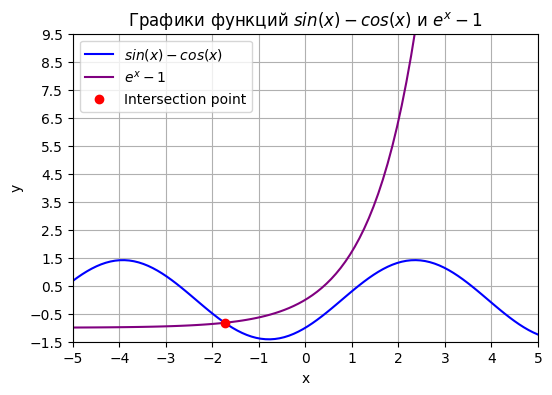

In [17]:
import numpy as np
import matplotlib.pyplot as plt


# Задаем диапазон значений по x
x = np.linspace(-5, 5, 100)

# Вычисляем значения функций для заданных x
y1 = np.sin(x) - np.cos(x)
y2 = np.exp(x) - 1

plt.figure(figsize=(6, 4))

# Рисуем графики функций с указанием цветов и меток
plt.plot(x, y1, color='blue', label='$sin(x) - cos(x)$')
plt.plot(x, y2, color='purple', label='$e^x - 1$')

# Настраиваем оси и сетку
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графики функций $sin(x) - cos(x)$ и $e^x - 1$')
plt.xlim(-5, 5)
plt.ylim(-1.5, 9)
plt.xticks(np.arange(-5, 6, step=1))
plt.yticks(np.arange(-1.5, 10, step=1))
plt.grid(True)

# Добавляем точку пересечения графиков
intersection_x = -1.7346096
intersection_y = np.sin(intersection_x) - np.cos(intersection_x)
plt.scatter(intersection_x, intersection_y, color='red', label='Intersection point', zorder=2)

# Добавляем легенду
plt.legend()

plt.show()

### Часть 4

Создайте выборку из $10^4$ чисел из Гамма распределения с параметрами $k = 9$, $\theta = 0.5$. Постройте гистограмму плотности распределения для полученной выборки. Подпишите оси, добавьте заголовок, включите координатную сетку.

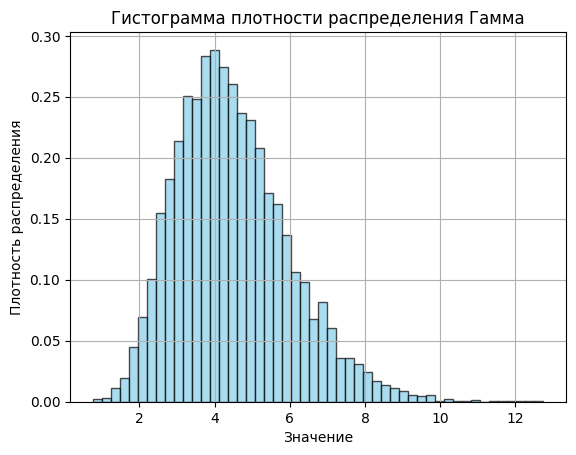

In [18]:
import numpy as np
import matplotlib.pyplot as plt


# Создание выборки из Гамма-распределения
gamma_sample = np.random.gamma(shape=9, scale=0.5, size=10**4)

# Построение гистограммы плотности распределения
plt.hist(gamma_sample, bins=50, density=True, color='skyblue', edgecolor='black', alpha=0.7)

# Добавление подписей и заголовка
plt.xlabel('Значение')
plt.ylabel('Плотность распределения')
plt.title('Гистограмма плотности распределения Гамма')

# Включение координатной сетки
plt.grid(True)

# Отображение графика
plt.show()